# 3-6. 프로젝트: 고양이 수염 스티커 만들기

## Step 1. 스티커 구하기 or 만들기

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


**사용할 이미지를 불러온다.**

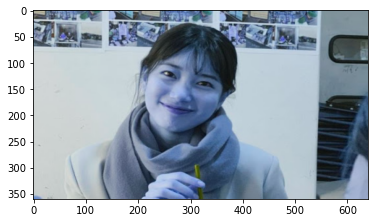

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/suzi.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

*사진에 푸른빛이 도는 것은 opencv의 특징 때문이라 한다. matplotlib, dlib 등은 이미지 채널을 RGB순으로 사용하고, opencv는 BGR 순으로 사용한다. 따라서 cv2.cvtColor로  컬러를 BGR을 RGB로 변환해 줘야 한다.

**얼굴의 bounding box를 추출하고 색상을 자연스럽게 변환한다.**

In [3]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  #opencv bgr을 rgb로
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(201, 81) (356, 236)]]


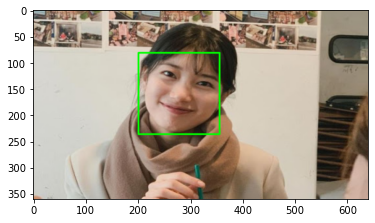

In [5]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**저장한 landmark 모델을 불러온다.**

In [6]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))      #랜드마크 목록 수 확인

68


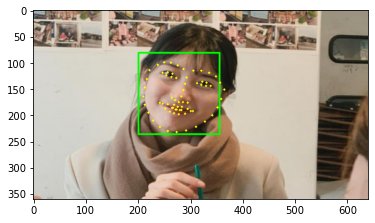

In [8]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # 랜드마크 표시하기, yellow point

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

고양이 수염이 적용 될 볼 위치를 landmark를 사용해서 계산해 주세요.
[hint] 2, 36, 48, 30 번 인덱스를 이용

**랜드마크를 사용해서 위치 확인하기**

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[2])     # 왼쪽 볼

(213, 147)


In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[36])   # 왼쪽 눈가

(247, 119)


In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[48])   # 왼쪽 입가

(242, 176)


In [12]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[14])   # 오른쪽 볼

(352, 185)


In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(283, 164)
(x,y) : (283,164)
(w,h) : (156,156)


**스티커 이미지를 읽고, resize한다.**

In [14]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))  # 인식된 얼굴 폭에 맞춰서 리사이즈
print (img_sticker.shape)

(156, 156, 3)


**스티커 이미지 좌표를 조정한다.**

*스티커 이미지의 좌표를 비율로 계산하는 것은 다른 사진을 적용했을 때에도 해당 좌표를 인식하도록 하기 위해서이다. 처음엔 좌표를 직접 찍어서 저장하면 될텐데, 수고롭게 비율을 왜 계산하는 걸까 생각했다.

In [15]:
refined_x = x - w//2# left  랜드마크 코[30] 좌표 x값에서 계산
refined_y = y - h//2 # top   랜드마크 코[30] 좌표 y값에서 계산
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (205,86)


**좌표 세부 조정**

In [16]:
# refined_y = 60
# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [17]:
# refined_x = 205
# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

## Step 4. 스티커 적용하기

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

*다른 이미지로 스티커를 적용했더니, .jpeg와 .svg 형식의 이미지는 인식을 하지 못한다. 검색해보니, .jpeg 투명 이미지를 지원하지 않는다 한다.

In [18]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

**결과 이미지를 출력한다.**

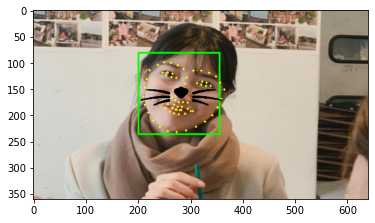

In [19]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

**bounding box와 landmarks 제거하기**

In [20]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

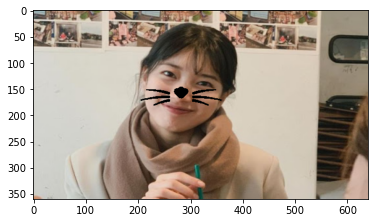

In [21]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

**+ 다른 스티커 추가하기(하트 스티커)**

In [22]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/001.png'
add_img_sticker = cv2.imread(sticker_path)
add_img_sticker = cv2.resize(add_img_sticker, (w,h))  # 인식된 얼굴 폭에 맞춰서 리사이즈
print (add_img_sticker.shape)

(156, 156, 3)


In [23]:
add_refined_x = x + w  # left  랜드마크 코[30] 좌표 x값에서 계산
add_refined_y = y - h//2      # top   랜드마크 코[30] 좌표 y값에서 계산
print ('(x,y) : (%d,%d)'%(add_refined_x, add_refined_y))

(x,y) : (439,86)


In [24]:
add_sticker_area = img_bgr[add_refined_y:add_refined_y+add_img_sticker.shape[0], add_refined_x:add_refined_x+add_img_sticker.shape[1]]
img_bgr[add_refined_y:add_refined_y+add_img_sticker.shape[0], add_refined_x:add_refined_x+add_img_sticker.shape[1]] = \
    np.where(add_img_sticker==0,add_sticker_area,add_img_sticker).astype(np.uint8)

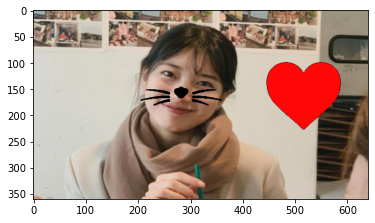

In [25]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.
[hint] opencv 의 cv2.addWeighted() 를 참고하세요.

*고양이 수염은 검은색이어서 투명도 조절을 해도 확인이 어렵다 하여, 하트로 변경하여 투명도를 조절해보려 한다. 

In [26]:
import cv2

img1= add_sticker_area
img2= add_img_sticker
img3= cv2.addWeighted(img1,1, img2, 0.2, 0)

In [27]:
add_sticker_area = img_bgr[add_refined_y:add_refined_y+add_img_sticker.shape[0], add_refined_x:add_refined_x+add_img_sticker.shape[1]]
img_bgr[add_refined_y:add_refined_y+add_img_sticker.shape[0], add_refined_x:add_refined_x+add_img_sticker.shape[1]] = \
    np.where(add_img_sticker==0,add_sticker_area,img3).astype(np.uint8)

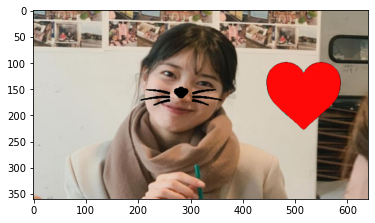

In [28]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. 문제점 찾아보기

(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

**(1)-1. 얼굴의 일부가 가려진 사진: 얼굴 인식 불가**

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


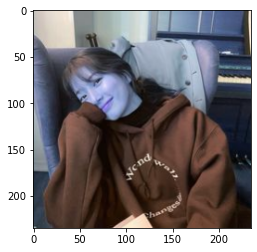

In [30]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/suzi02.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (235, 235))  
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()

In [31]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [32]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  #opencv bgr을 rgb로
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[]


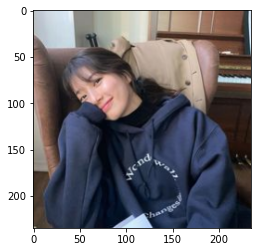

In [33]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**(1)-2. 얼굴의 측면: 얼굴 인식 불가**

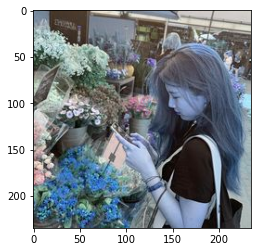

In [34]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/suzi03.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (235, 235))   
img_show = img_bgr.copy()    
plt.imshow(img_bgr)
plt.show()

In [35]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [36]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  #opencv bgr을 rgb로
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[]


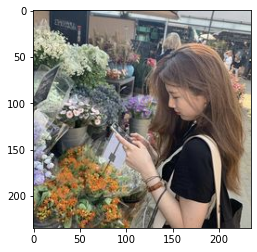

In [37]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**(1)-3. 이미지 비율 왜곡: 얼굴 인식 불가**

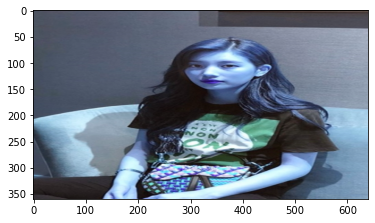

In [38]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/suzi04.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))   
img_show = img_bgr.copy()     
plt.imshow(img_bgr)
plt.show()

In [39]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [40]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  #opencv bgr을 rgb로
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[]


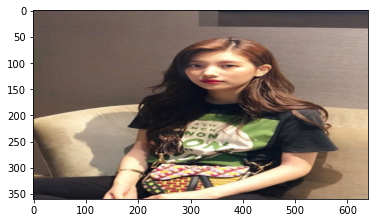

In [41]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**그러나 이미지의 비율을 원래 비율로 돌리면, 얼굴을 인식할 수 있다.**

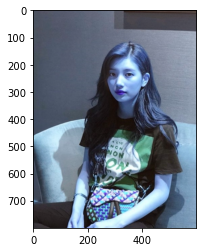

In [42]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/suzi04.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (600, 800))   
img_show = img_bgr.copy()     
plt.imshow(img_bgr)
plt.show()

In [43]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [44]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  #opencv bgr을 rgb로
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(236, 184) (390, 339)]]


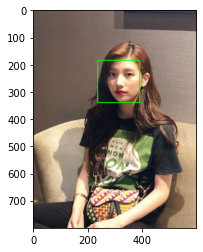

In [45]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**(1)-4. 다중 얼굴 인식하기**

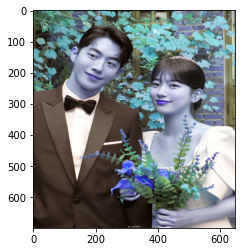

In [46]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/suzi05.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (650, 700))   
img_show = img_bgr.copy()     
plt.imshow(img_bgr)
plt.show()

In [47]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [48]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  #opencv bgr을 rgb로
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(132, 116) (287, 270)], [(366, 211) (474, 319)]]


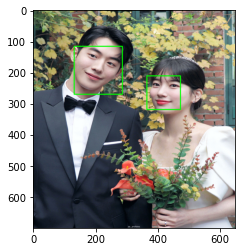

In [49]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [50]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [51]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))   #첫번째 인식된 얼굴의 랜드마크
print(len(list_landmarks[1]))   #두번째 인식된 얼굴의 랜드마크
print(len(list_landmarks))  #랜드마크 확인

68
68
2


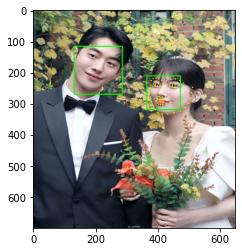

In [52]:
for landmark in list_landmarks[1]:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # 랜드마크 표시하기, yellow point

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

*두 개의 얼굴을 모두 인식했으나, 랜드마크는 하나의 얼굴에만 표시되었다. 18행에서 무엇을 수정해야 하는지 모르겠다.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

**문제점**

얼굴 측면과 얼굴의 일부가 가려져 있는 사진에서는 얼굴의 bounding box를 인식하지 못했다. 또한 원 이미지의 가로세로 비율이 왜곡되거나 이미지가 어두운 경우, 얼굴이 인식되지 않았다.

**총평**

파이썬의 문법인 코드 구조 조차 제대로 이해하지 못하는 상태에서, 위의 내용을 처음부터 잘 이해한다는 것은 어려운 일인 듯 합니다. 
이번 프로젝트도 완벽하게 작성이 된 것은 아니지만, 다행히 프로젝트의 큰 맥락은 어느 정도 이해할 수 있게 된 것 같습니다.  

지난주 Exp 프로젝트들은 코드 오류가 난 곳부터, 어떻게 해결 해야할지 찾을 수가 없어서 제출을 하지 못했습니다.
앞으로 수행할 프로젝트들도 완벽하진 못하더라도, 이해한 부분까지 최대한 작성해서 제출하려 합니다.
(저와 같은 입문자들이 어디서 막히는지에 대한 정보가 되어, 노드 개선에 도움이 될 수도 있을 것 같습니다.)

**기타**

1. 26-27행: 하트의 투명도 적용
2. 52행: 두 얼굴에 랜드마크 적용

위의 부분에서 코드가 제대로 작성되었는지, 두 얼굴 모두 인식하려면 무엇을 수정해야할지 피드백이 가능할까요.